In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))
from utils import read_input
import numpy as np

INPUT_PATH = os.path.abspath("../inputs/day5/puzzle1.txt")

input_data = read_input(INPUT_PATH)

In [2]:
from collections import namedtuple

In [3]:
Point = namedtuple("Point", ["x", "y"])

In [4]:
Line = namedtuple("Line", ["start", "end"])

In [5]:
lines = []
for i, line in enumerate(input_data):
    points = line.split(" -> ")
    lines.append(Line(*(Point(*(int(x) for x in point.split(","))) for point in points)))

In [6]:
straight_lines = list(filter(lambda x: x.start.x == x.end.x or x.start.y == x.end.y, lines))

In [7]:
def join_points(p1, p2):
    delta_x = p2.x - p1.x
    delta_y = p2.y - p1.y
    if delta_x != 0:
        if delta_x >= 0:
            step = 1
        elif delta_x < 0:
            step = -1
        xs = np.arange(p1.x, p2.x + step, step)
        ys = np.array([p1.y]) + (delta_y / delta_x) * (xs - p1.x)
    else:
        if delta_y >= 0:
            step = 1
        elif delta_y < 0:
            step = -1
        ys = np.arange(p1.y, p2.y + step, step)
        xs = np.array(p1.x) + (delta_x / delta_y) * (ys - p1.y)
    return np.array(xs), np.array(ys)

In [8]:
line_arrays = [join_points(*line) for line in lines]
straight_line_arrays = [join_points(*line) for line in straight_lines]

In [9]:
import matplotlib.pyplot as plt

In [10]:
straight_line_arrays;

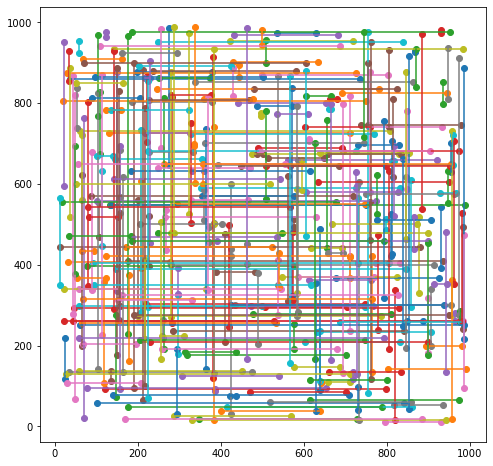

In [11]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
for i, (xs, ys) in enumerate(straight_line_arrays):
    ax.plot(xs, ys)
    ax.scatter(list(map(lambda x: x.x, straight_lines[i])), list(map(lambda x: x.y, straight_lines[i])))

In [12]:
straight_lines;

# Part One

In [13]:
from collections import Counter

In [14]:
covered_points = [tuple(zip(xs.astype(int), ys.astype(int))) for xs, ys in straight_line_arrays]

In [15]:
unnested_covered_points = [point for line in covered_points for point in line]

In [16]:
point_counter = Counter(unnested_covered_points)

In [17]:
len([point for point, count in point_counter.items() if count >= 2])

7380

# Part Two

In [18]:
from collections import Counter

In [19]:
covered_points = [tuple(zip(xs.astype(int), ys.astype(int))) for xs, ys in line_arrays]

In [20]:
unnested_covered_points = [point for line in covered_points for point in line]

In [21]:
point_counter = Counter(unnested_covered_points)

In [22]:
len([point for point, count in point_counter.items() if count >= 2])

21373